![](https://i0.wp.com/cdn-prod.medicalnewstoday.com/content/images/articles/172/172179/a-cross-section-graphic-of-the-kidneys.jpg?w=1155&h=978)

# Introduction 
Our kidney is involved in multiple key functions. 
* They help to maintain overall fluid balance 
* They help to regulate and filter minerals from blood
* They help to filter wastes generated from medications, food and toxic substances
* They then help in creating hormones that help produce red blood cells, promote bone health, and regulate blood pressure

### So what happens if our kidney is damaged?
We have two kidneys. If one doesn't function well, the burdens get carried over to the second kidney. If the patient fails to take drastic measures to improve his/her condition, both kidneys will fail, leading to acute renal failure. This can be fatal without artificial filtering (dialysis) or a kidney transplant. Of course, this occurs at the advance stage of chronic kidney disease and symptoms will only show up at a severe stage. 

# Purpose of this project
- We will like to find out the correlation between these health attributes and chronic kidney disease.
    * This way we can allow early detections that facilitate medical interventions
- Identify key precursors to chronic kidney disease that can be used for machine learning 

## Importing packages 
- Here we will import required packages, namely Numpy, Pandas, Matplotlib, Seaborn and Scipy.stats

In [1]:
# Importing packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats # Needed to compute statistics for categorical data

## Importing dataset into notebook and previewing it

In [2]:
kidney_data = pd.read_csv('../input/ckdisease/kidney_disease.csv')
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Check for any unknown, NaN or NULL values

In [3]:
kidney_data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Dealing with NaN values 
- There are numerous way we can deal with this. Firstly, we can choose to remove all the rows that are associated with the NaN values. Secondly, we can replace the NaN values with the mean or median value of the column. According to [Matt Brems](https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf), I gathered the following:
    * If we choose to remove the rows that comprise the NaN value, we are more likely to obtain well-behaved results, usually software-default. However, we do lose some precision in our collected data. 
    * If we choose to drop no observation and replace them with what is available in the data, we will not encounter well-behaved results (invalid covariance matrices) but we did utilise all the data as intended. 

- Well, I have decided to remove the rows associated with the NaN values since I am not losing that much data (below my required threshold).

In [4]:
kidney_data = kidney_data.dropna(axis=0)
kidney_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Data cleaning

Looks like we have cleared all the NaN values. Moving on, we will need to clean the data such that we replace all positive data like 'normal', 'positive', 'True', 'yes' with 1 and all negative data('abnormal', negative', 'false', 'no') with 0. 

In [5]:
kidney_data['rbc'] = kidney_data.rbc.replace(['normal','abnormal'], ['1', '0'])
kidney_data['pc'] = kidney_data.pc.replace(['normal','abnormal'], ['1', '0'])
kidney_data['pcc'] = kidney_data.pcc.replace(['present','notpresent'], ['1', '0'])
kidney_data['ba'] = kidney_data.ba.replace(['present','notpresent'], ['1', '0'])
kidney_data['htn'] = kidney_data.htn.replace(['yes','no'], ['1', '0'])
kidney_data['dm'] = kidney_data.dm.replace(['yes','no'], ['1', '0'])
kidney_data['cad'] = kidney_data.cad.replace(['yes','no'], ['1', '0'])
kidney_data['appet'] = kidney_data.appet.replace(['good','poor'], ['1', '0'])
kidney_data['pe'] = kidney_data.pe.replace(['yes','no'], ['1', '0'])
kidney_data['ane'] = kidney_data.ane.replace(['yes','no'], ['1', '0'])
kidney_data['classification'] = kidney_data.classification.replace(['ckd','ckd\t','notckd'], ['positive', 'positive','negative'])
kidney_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,positive
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,positive
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,positive
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,positive
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24,9200,3.2,1,1,1,0,1,1,positive


### Here, we will use the PairPlot tool from Seaborn to see the distribution and relationships among variables.

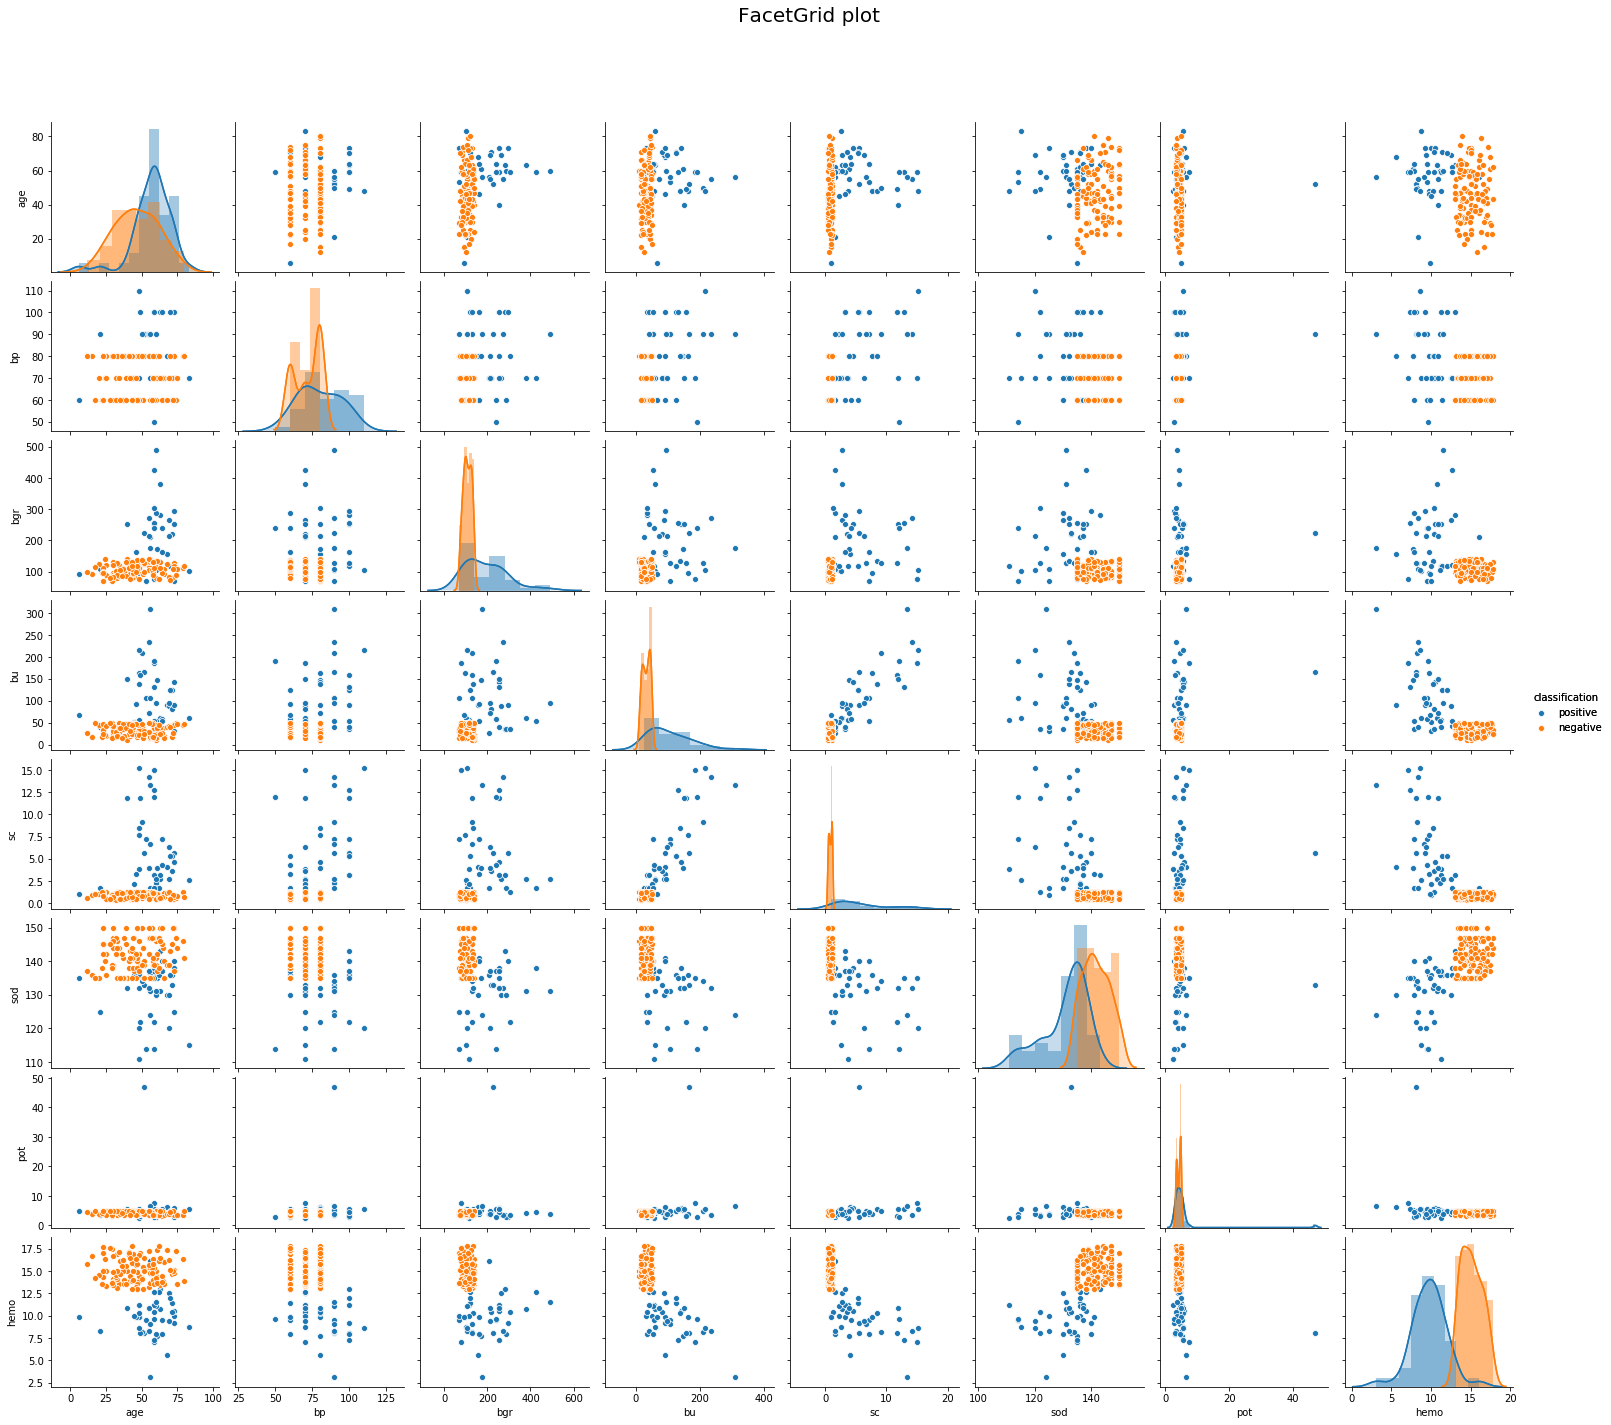

In [6]:
g = sns.pairplot(kidney_data, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
- We do observe distinct classification of positive and negative result in each targeted health attribute. 
- Before I continue, the first thing I usually look at is the number of test subjects for each classification, the age and gender(not provided) in order to understand the test subjects involved in this study.  
- We have fairly similar mean age among these 2 test subjects but we do observe significantly more test subjects tested negative for chronic kidney disease. The data cleaning done to remove NaN values seem to have cleared out a huge amount of test subjects with chronic kidney disease. 
- At this point I was thinking of replacing my NaN values with the median value of the column but then I realised that the red blood cell(rbc) atribute is a nominal data. 

In [7]:
kidney_data[kidney_data['classification'] == 'positive'].describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,134.000000,57.279070,80.000000,1.012791,2.930233,0.930233,193.930233,104.930233,5.711628,131.023256,5.506977,9.769767
std,76.961338,13.463046,14.474937,0.005036,1.032688,1.352165,96.458823,64.541753,4.215008,7.917697,6.568083,2.172067
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,26.000000,0.900000,111.000000,2.500000,3.100000
25%,75.000000,51.000000,70.000000,1.010000,2.000000,0.000000,117.500000,54.500000,2.650000,127.500000,3.800000,8.300000
50%,144.000000,59.000000,80.000000,1.010000,3.000000,0.000000,173.000000,90.000000,4.100000,133.000000,4.600000,9.800000
75%,197.000000,64.000000,90.000000,1.015000,4.000000,2.000000,253.000000,145.000000,7.450000,136.000000,5.300000,11.000000
max,249.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,143.000000,47.000000,16.100000


In [8]:
kidney_data[kidney_data['classification'] == 'negative'].describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,115.000000,115.000000,115.000000,115.000000,115.0,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,327.504348,46.678261,71.826087,1.022522,0.0,0.0,107.939130,33.000000,0.871304,141.773913,4.311304,15.152174
std,46.348863,15.289343,8.744182,0.002511,0.0,0.0,18.705608,11.766739,0.258459,4.735200,0.597769,1.322434
min,250.000000,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,0.400000,135.000000,3.300000,13.000000
25%,284.500000,34.500000,60.000000,1.020000,0.0,0.0,94.000000,23.000000,0.600000,138.000000,3.700000,14.000000
50%,333.000000,46.000000,70.000000,1.025000,0.0,0.0,108.000000,34.000000,0.900000,141.000000,4.500000,15.000000
75%,368.500000,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,1.100000,146.000000,4.900000,16.200000
max,399.000000,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,1.200000,150.000000,5.000000,17.800000


In [9]:
kidney_data1 = pd.read_csv('../input/ckdisease/kidney_disease.csv')
kidney_data1[kidney_data1['rbc'].isnull()].groupby(['classification']).size().reset_index(name = 'count')

,classification,count
0,ckd,142
1,ckd\t,1
2,notckd,9


## So what can we do?
- The author of this dataset encourages everyone to omit rows with NaN data. I have decided to utilise the interpolation method from Pandas library to retain the NaN values. 

In [10]:
kidney_data = pd.read_csv('../input/ckdisease/kidney_disease.csv')

In [11]:
kidney_data = kidney_data.interpolate(method='pad')
kidney_data.rbc = kidney_data.rbc.interpolate(method='pad')
kidney_data.pc = kidney_data.pc.interpolate(method='pad')
kidney_data['rbc'] = kidney_data.rbc.replace(['normal','abnormal'], [1,0])
kidney_data['pc'] = kidney_data.pc.replace(['normal','abnormal'], [1,0])
kidney_data['pcc'] = kidney_data.pcc.replace(['present','notpresent'], [1,0])
kidney_data['ba'] = kidney_data.ba.replace(['present','notpresent'], [1,0])
kidney_data['htn'] = kidney_data.htn.replace(['yes','no'], [1,0])
kidney_data['dm'] = kidney_data.dm.replace(['yes','no'], [1,0])
kidney_data['cad'] = kidney_data.cad.replace(['yes','no'], [1,0])
kidney_data['appet'] = kidney_data.appet.replace(['good','poor'], [1,0])
kidney_data['pe'] = kidney_data.pe.replace(['yes','no'], [1,0])
kidney_data['ane'] = kidney_data.ane.replace(['yes','no'], [1,0])
kidney_data['classification'] = kidney_data.classification.replace(['ckd','ckd\t','notckd'], [1,1,0])
kidney_data['wc'] = kidney_data.wc.replace(['\t6200','\t8400'], [6200,8400])
kidney_data = kidney_data.dropna(axis=0)
kidney_data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

- The reason why I did a separate interpolation on red blood cell and pus cell is because the interpolation method failed to address the NaN values in rbc and pc. Hence, I have to specify it again on the next line. 

## Now let's look into the pairplot.

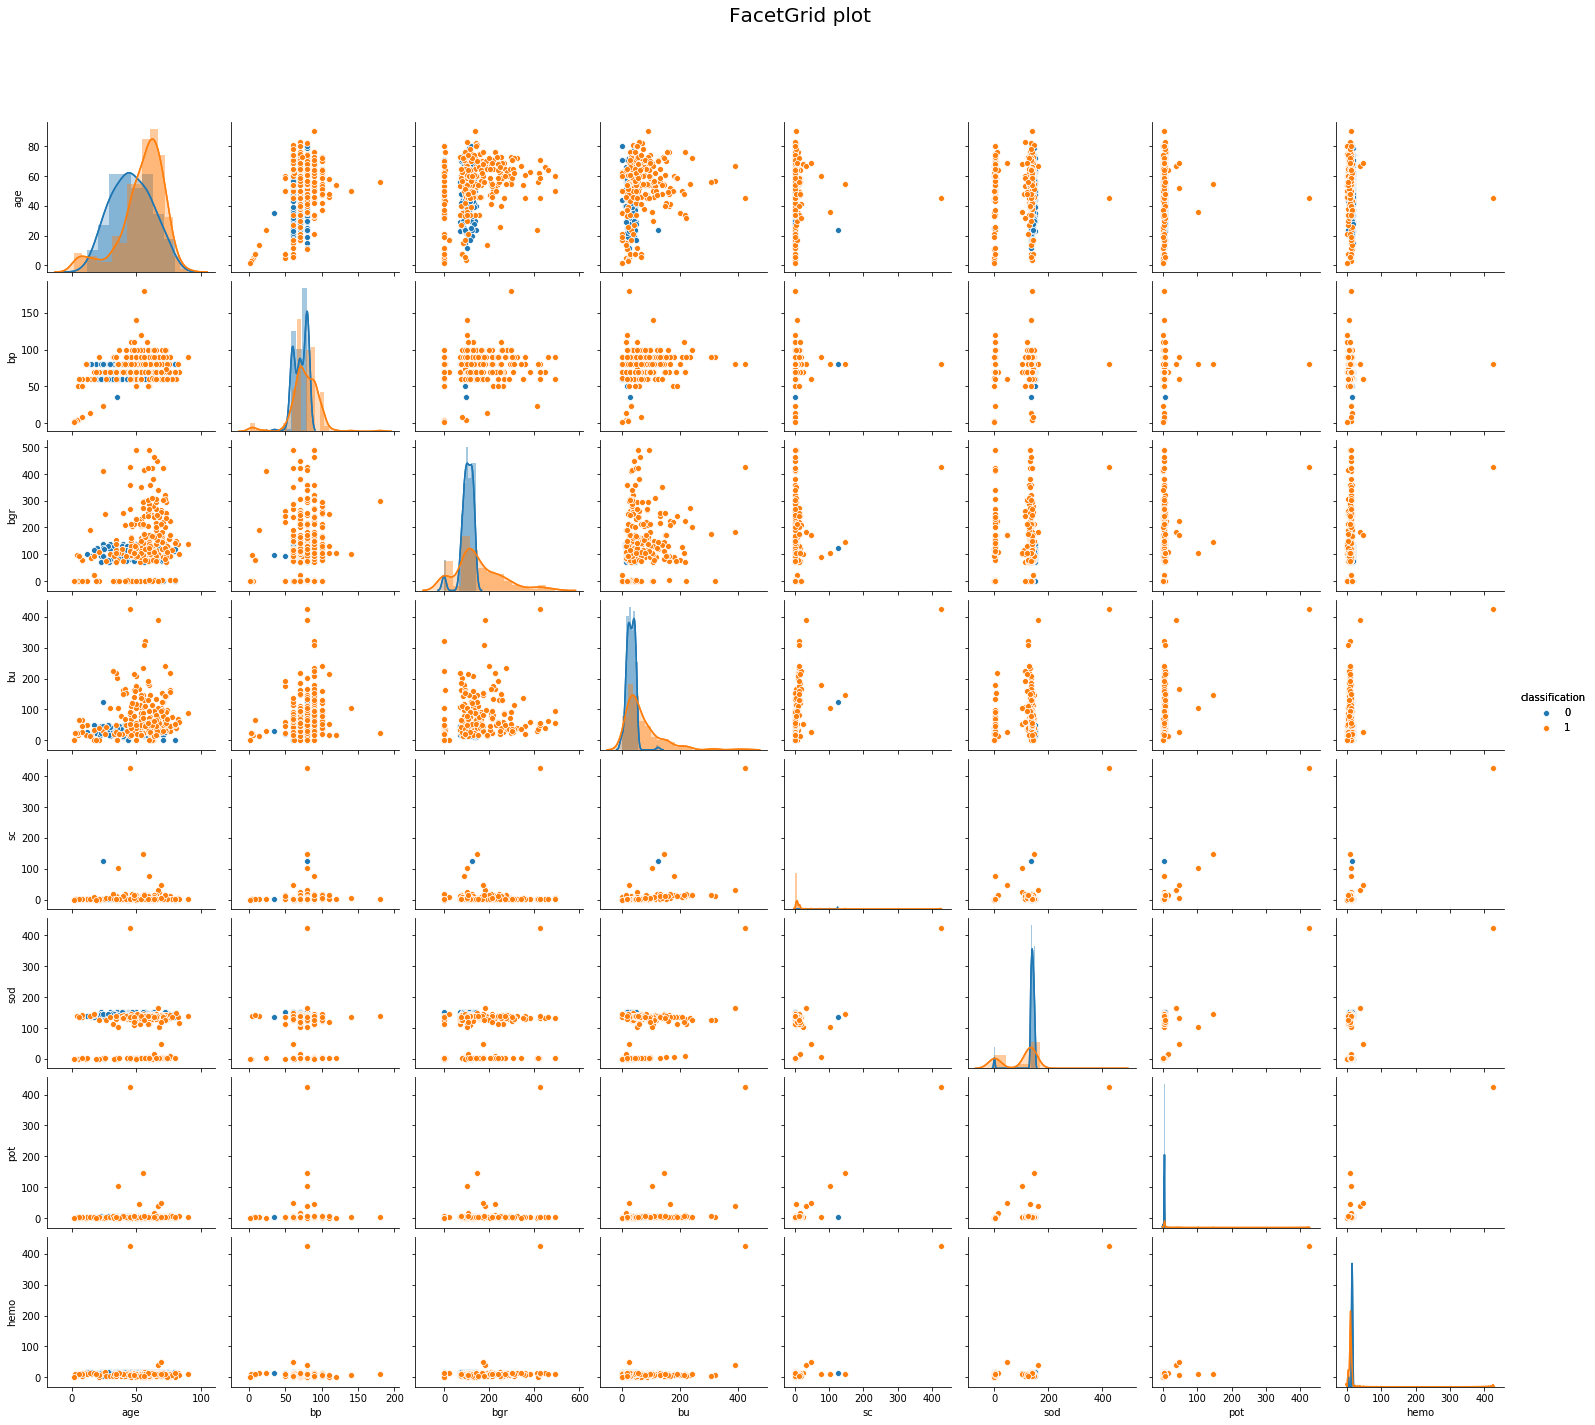

In [12]:
gg = sns.pairplot(kidney_data, vars =['age', 'bp','bgr', 'bu', 'sc','sod', 'pot', 'hemo'],hue = 'classification')
gg.map_diag(sns.distplot)
gg.add_legend()
gg.fig.suptitle('FacetGrid plot', fontsize = 20)
gg.fig.subplots_adjust(top= 0.9);

## What can we observe here?
- For majority of the attributes, other than age, we do observe similar peaks between patients with chronic kidney disease and healthy individuals. 
- Like stated before, the trade-off for choosing to retain data is the creation of less well-behaved results. Yes, we do not see distinct characteristics like the previous Pairplot but that does not mean our data is flawed or lacking. Dealing with large data has its own problem and we should not modify the data to suit our needs or hypotheses. 

## Let's look into correlation to have a better understanding on our data.

In [13]:
corr = kidney_data.corr()
corr.style.background_gradient(cmap='RdBu_r')

,id,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,pot,hemo,pe,ane,classification
id,1,-0.20142,-0.185869,-0.170041,-0.177459,-0.162876,0.41327,0.39068,-0.199749,-0.300428,-0.115114,0.305124,-0.071565,0.0318398,-0.314218,-0.281956,-0.839916
age,-0.20142,1,0.308701,0.142774,0.144476,0.146816,-0.107455,-0.136684,0.265395,0.167227,-0.012127,-0.0411733,-0.00809799,-0.0334609,0.0932562,0.049395,0.236288
bp,-0.185869,0.308701,1,0.222679,0.131165,0.131594,-0.177065,-0.128146,0.14443,0.192272,0.0569915,-0.0318414,0.0262737,-0.0184393,-0.00549108,0.144273,0.196955
sg,-0.170041,0.142774,0.222679,1,0.917805,0.922382,-0.160499,-0.0803105,0.0923041,0.146912,0.0234459,-0.0384646,-0.0154922,-0.0557322,0.113992,0.174114,0.211321
al,-0.177459,0.144476,0.131165,0.917805,1,0.998357,-0.150151,-0.0689819,0.0769105,0.198627,0.0352054,-0.0455259,-0.00958197,-0.054857,0.0968355,0.21661,0.232956
su,-0.162876,0.146816,0.131594,0.922382,0.998357,1,-0.140994,-0.0490543,0.0878521,0.182645,0.0299752,-0.0446446,-0.0136274,-0.0571792,0.0803336,0.203104,0.216495
rbc,0.41327,-0.107455,-0.177065,-0.160499,-0.150151,-0.140994,1,0.250402,-0.0843425,-0.183997,-0.0226418,0.213929,0.0243028,0.0929879,-0.228128,-0.146215,-0.472086
pc,0.39068,-0.136684,-0.128146,-0.0803105,-0.0689819,-0.0490543,0.250402,1,-0.163917,-0.360734,-0.124143,0.167997,-0.0906044,-0.0436872,-0.339372,-0.254904,-0.431557
bgr,-0.199749,0.265395,0.14443,0.0923041,0.0769105,0.0878521,-0.0843425,-0.163917,1,0.189764,0.160017,0.0862929,0.169713,0.15233,0.0549082,0.0468846,0.265915
bu,-0.300428,0.167227,0.192272,0.146912,0.198627,0.182645,-0.183997,-0.360734,0.189764,1,0.474934,0.179965,0.396852,0.302202,0.298523,0.388032,0.35577


- I will say that an absolute value of more than 0.4 is considered to be significant.
- It seems like there are a significant negative correlation between rbc, pc and whether the patient has chronic kidney disease. 
- Even so, I will look into age, red blood cell, pus cell, blood glucose random, serum creatinine, diabetes mellitus, coronary artery disease, blood urea, sodium, pedal edema and anemia. 

# Correlation between age and whether a patient has chronic kidney disease

- Firstly, let's look at the distribution.

Text(0, 0.5, 'Age')

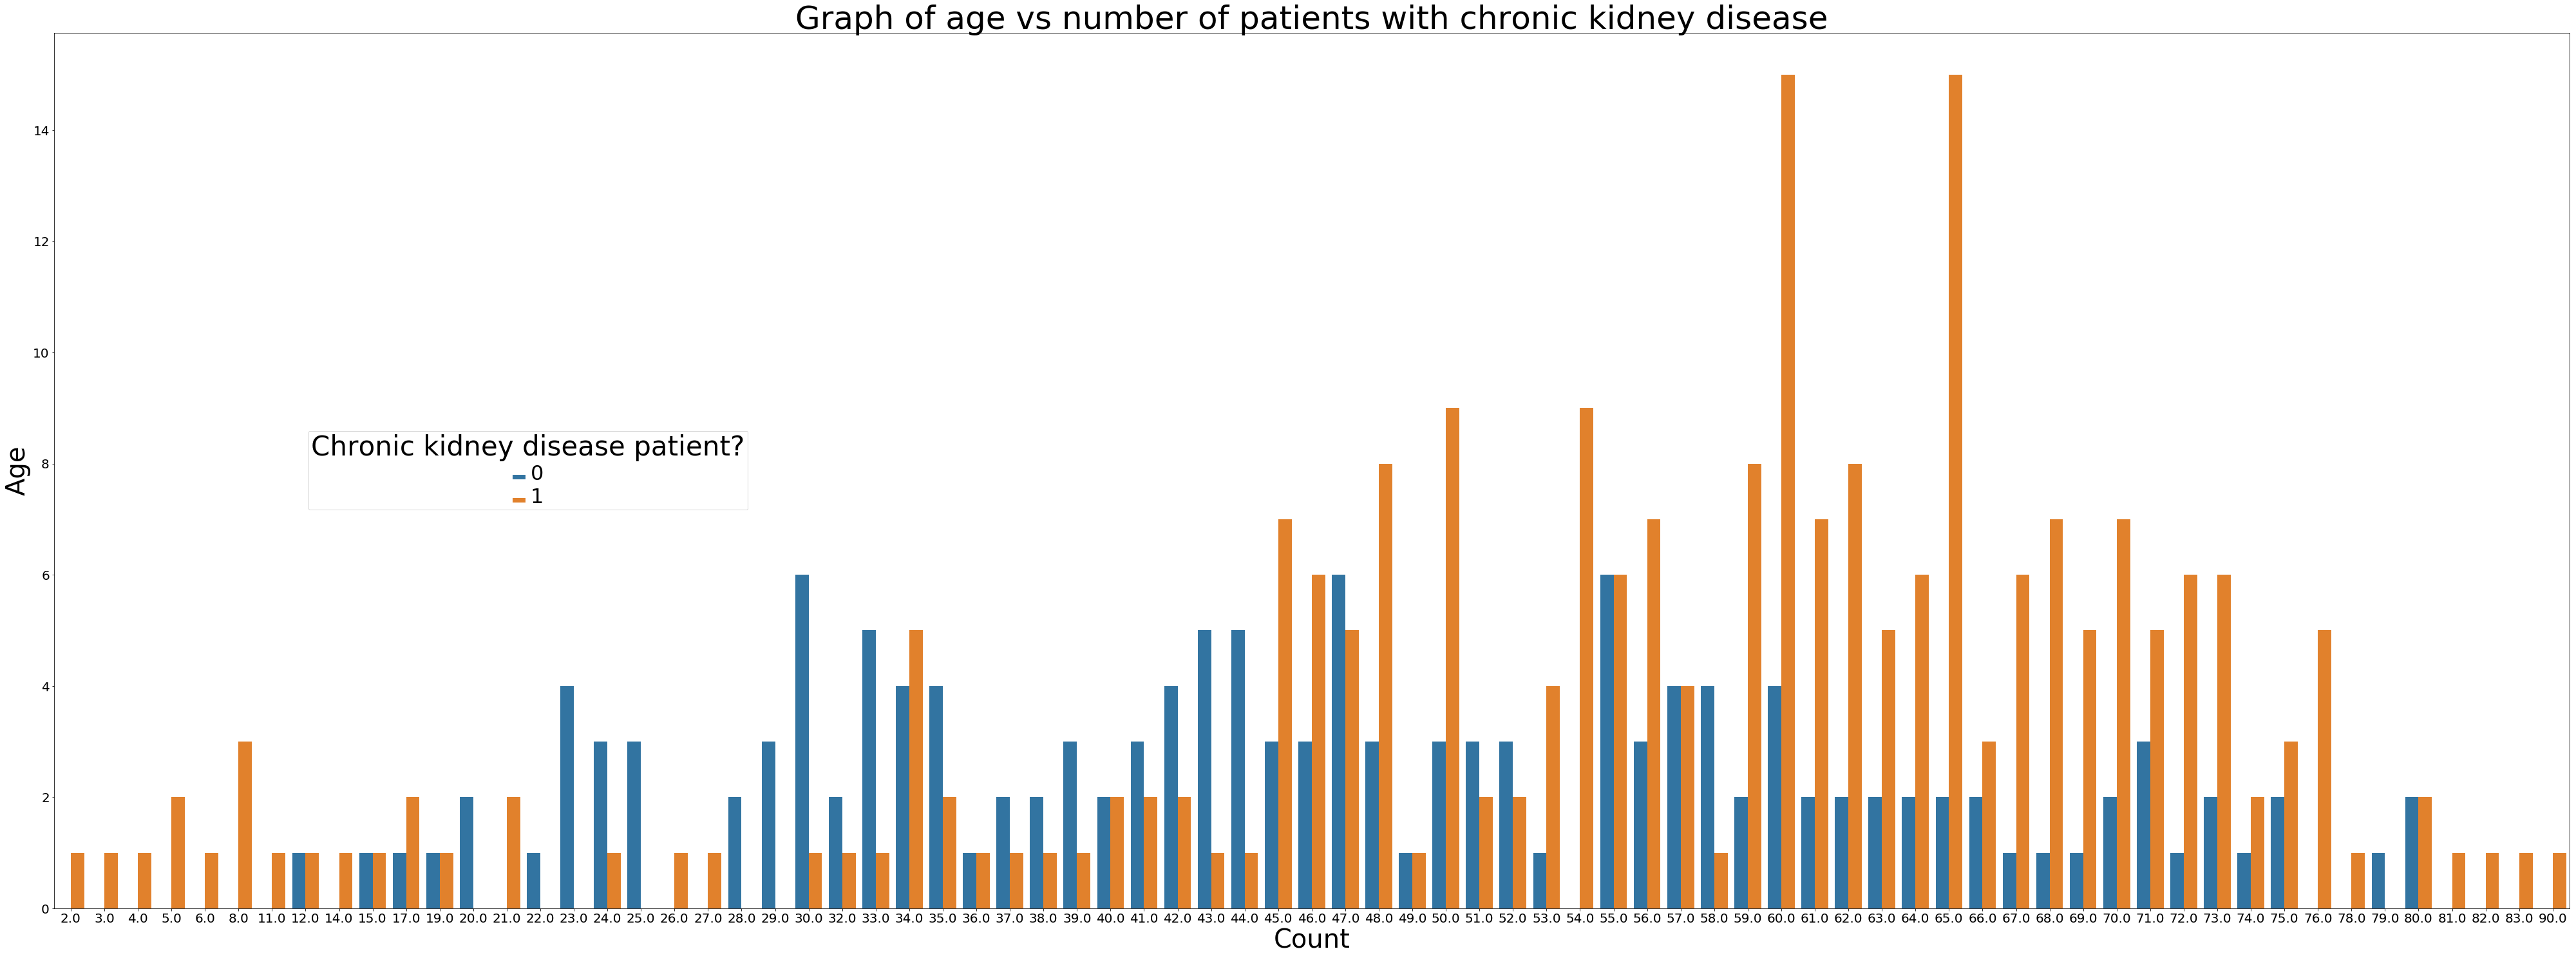

In [14]:
plt.figure(figsize=(70,25))
plt.legend(loc='upper left')
g = sns.countplot(data = kidney_data, x = 'age', hue = 'classification')
g.legend(title = 'Chronic kidney disease patient?', loc='center left', bbox_to_anchor=(0.1, 0.5), ncol=1)
g.tick_params(labelsize=20)
plt.setp(g.get_legend().get_texts(), fontsize='32')
plt.setp(g.get_legend().get_title(), fontsize='42')
g.axes.set_title('Graph of age vs number of patients with chronic kidney disease',fontsize=50)
g.set_xlabel('Count',fontsize=40)
g.set_ylabel("Age",fontsize=40)

In [15]:
age_corr = ['age', 'classification']
age_corr1 = kidney_data[age_corr]
age_corr_y = age_corr1[age_corr1['classification'] == 1].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,0.387084
count,0.387084,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs chronic kidney disease patient')

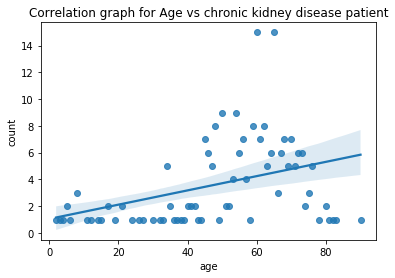

In [16]:
sns.regplot(data = age_corr_y, x = 'age', y = 'count').set_title("Correlation graph for Age vs chronic kidney disease patient")

In [17]:
age_corr_n = age_corr1[age_corr1['classification'] == 0].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.00000,-0.13443
count,-0.13443,1.00000


Text(0.5, 1.0, 'Correlation graph for Age vs healthy patient')

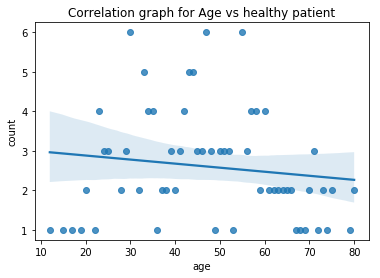

In [18]:
sns.regplot(data = age_corr_n, x = 'age', y = 'count').set_title("Correlation graph for Age vs healthy patient")

## What do we observe here?
- From what we know, we have approximately 150 healthy subjects and 250 chronic kidney disease patients. 
- There is a weak positive correlation between age and chronic kidney disease patients. We obtained an R value of approximately 0.387 and an R-square value of approximately 0.150. This means that only 15% of variation can be explained by the relationship between the 2 variables. 
- The [National Kidney Foundation](https://www.kidney.org/news/monthly/wkd_aging) has associated aging with kidney disease, stating that **"more than 50 percent of seniors over the age of 75 are believed to have kidney disease. Kidney disease has also been found to be more prevalent in those over the age of 60 when compared to the rest of the general population."**
- Although age is one of the factor that can cause chronic kidney disease, I believe that an unhealthy diet/lifestyle is equally as impactful as age. 

# Correlation between red blood cell and whether the patient has chronic kidney disease

Our kidneys create an essential hormone called erythropoietin(EPO). EPO are chemical messengers that plays a key role in the production of red blood cell. Patients with chronic kidney disease has low EPO, resulting in low level of red blood cell. This will eventually lead to anemia. 
- Given that the red blood cell here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [19]:
# Chi-sq test
cont = pd.crosstab(kidney_data["rbc"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(84.28488209722242,
 4.283783333596152e-20,
 1,
 array([[ 39.28865979,  63.71134021],
        [108.71134021, 176.28865979]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between the condition of red blood cell and whether the patient has chronic kidney disease. 

# Correlation between pus cell and whether a patient has chronic kidney disease
- Patients with chronic kidney diseases tend to have pus cell in their urine sample. This could mean that they have infection in the kidney.
- Given that the pus cell here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [20]:
# Chi-sq test
cont = pd.crosstab(kidney_data["pc"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(70.17215190022236,
 5.434829114199849e-17,
 1,
 array([[ 34.32989691,  55.67010309],
        [113.67010309, 184.32989691]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between the condition of pus cell and whether the patient has chronic kidney disease. 

# Correlation between blood glucose and whether a patient has chronic kidney disease
- There is a risk of low blood sugar in patients with chronic kidney disease as kidney function declines insulin and if the patient suffers from diabetes, the diabetes medications will remain in the system longer because of decreased kidney clearance.

In [21]:
# Measuring blood glucose and chronic kidney disease patient 
bgr_corr = ['bgr', 'classification']
bgr_corr1 = kidney_data[bgr_corr]
bgr_corr1.bgr = bgr_corr1.bgr.round(-1)
bgr_corr_y = bgr_corr1[bgr_corr1['classification'] == 1].groupby(['bgr']).size().reset_index(name = 'count')
bgr_corr_y.corr()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,bgr,count
bgr,1.00000,-0.65953
count,-0.65953,1.00000


Text(0.5, 1.0, 'Correlation graph for blood glucose vs chronic kidney disease patient')

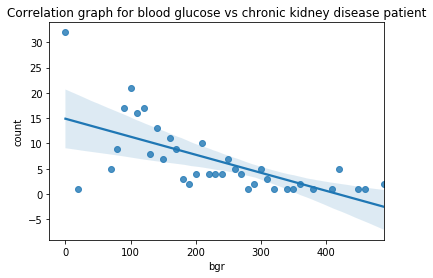

In [22]:
sns.regplot(data = bgr_corr_y, x = 'bgr', y = 'count').set_title("Correlation graph for blood glucose vs chronic kidney disease patient")

In [23]:
bgr_corr_n = bgr_corr1[bgr_corr1['classification'] == 0].groupby(['bgr']).size().reset_index(name = 'count')
bgr_corr_n.corr()

,bgr,count
bgr,1.000000,0.500498
count,0.500498,1.000000


Text(0.5, 1.0, 'Correlation graph for blood glucose vs healthy patient')

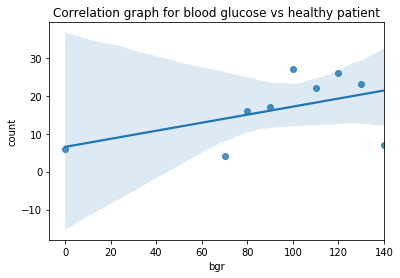

In [24]:
sns.regplot(data = bgr_corr_n, x = 'bgr', y = 'count').set_title("Correlation graph for blood glucose vs healthy patient")

## What do we observe here?
- There is a strong negative correlation in patient with chronic kidney disease while we observe a strong positive correlation in healthy patients. We obtained an R square value of 0.435 and 0.25 respectively in CKD patients and healthy patients. This means that approximately 44% of the variation can be explained by the relationship of the 2 variables (low blood glucose and chronic kidney disease patients). We do observe a positive relationship betweeen blood glucose and healthy patients as expected. 

# Correlation between blood urea and chronic kidney disease
- Urea is the principal nitrogenous waste product of metabolism and is generated from protein breakdown.
- It is eliminated from the body almost exclusively by the kidneys in urine, and measurement of its concentration, first in urine and later in blood, has had clinical application in the assessment of kidney function for well over 150 years.

In [25]:
# Measuring blood urea and chronic kidney disease patient 
bu_corr = ['bu', 'classification']
bu_corr1 = kidney_data[bu_corr]
bu_corr1.bu = kidney_data.bu.round(-1)
bu_corr_y = bu_corr1[bu_corr1['classification'] == 1].groupby(['bu']).size().reset_index(name = 'count')
bu_corr_y.corr()

,bu,count
bu,1.000000,-0.712187
count,-0.712187,1.000000


Text(0.5, 1.0, 'Correlation graph for blood urea vs CKD patient')

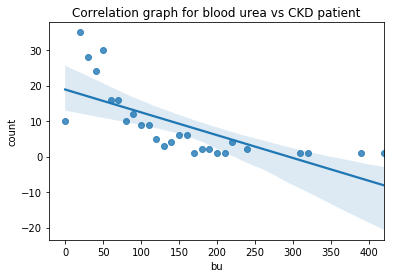

In [26]:
sns.regplot(data = bu_corr_y, x = 'bu', y = 'count').set_title('Correlation graph for blood urea vs CKD patient')

In [27]:
bu_corr_n = bu_corr1[bu_corr1['classification'] == 0].groupby(['bu']).size().reset_index(name = 'count')
bu_corr_n.corr()

,bu,count
bu,1.000000,-0.200578
count,-0.200578,1.000000


Text(0.5, 1.0, 'Correlation graph for blood urea vs healthy patient')

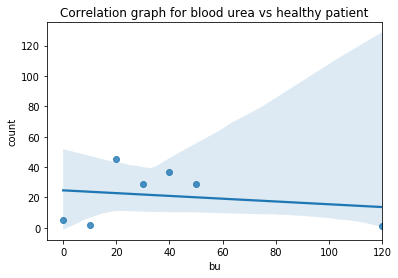

In [28]:
sns.regplot(data = bu_corr_n, x = 'bu', y = 'count').set_title('Correlation graph for blood urea vs healthy patient')

## What do we see here?
- This result seems to be completely opposite of what I thought. You see, urea is mostly removed from the urine and those with chronic kidney disease will have issue removing this waste from the urine. As a result, majority of the urea gets retained in the blood, resulting in high blood urea. However, the negative correlation observed here seems to show a different outlook. What I can say about this is that the patients may be well-informed about his or her condition and might be in a controlled diet, resulting in low amount of blood urea.

# Correlation between sodium and CKD
- CKD patients are expected to have low sodium level in their blood. As the damaged kidneys were unable to balance the fluid in the body, large amount of fluid get retained and this lowers the amount of sodium in the blood. 

In [29]:
# Measuring blood sodium and chronic kidney disease patient 
sod_corr = ['sod', 'classification']
sod_corr1 = kidney_data[sod_corr]
sod_corr_y = sod_corr1[sod_corr1['classification'] == 1].groupby(['sod']).size().reset_index(name = 'count')
sod_corr_y.corr()

,sod,count
sod,1.00000,0.25641
count,0.25641,1.00000


Text(0.5, 1.0, 'Correlation graph for blood sodium vs CKD patient')

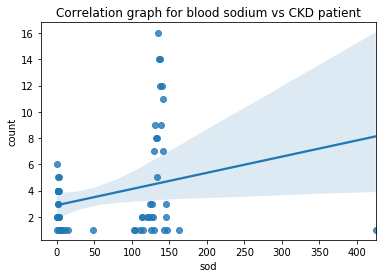

In [30]:
sns.regplot(data = sod_corr_y, x = 'sod', y = 'count').set_title('Correlation graph for blood sodium vs CKD patient')

In [31]:
sod_corr_n = sod_corr1[sod_corr1['classification'] == 0].groupby(['sod']).size().reset_index(name = 'count')
sod_corr_n.corr()

,sod,count
sod,1.000000,0.561326
count,0.561326,1.000000


Text(0.5, 1.0, 'Correlation graph for blood sodium vs healthy patient')

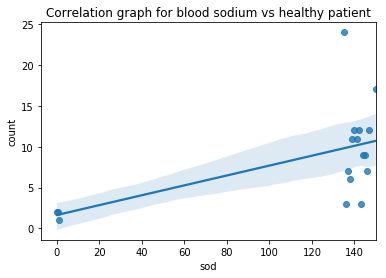

In [32]:
sns.regplot(data = sod_corr_n, x = 'sod', y = 'count').set_title('Correlation graph for blood sodium vs healthy patient')

## What do we see here?
- We do not observe significant correlation between blood sodium and CKD. 

# Correlation between pedal edema and CKD
- Pedal edema is caused by excess fluid trapped in the body's tissues. Damaged kidney causes fluid retentions and most of this fluid gets trapped in the hands, arms, feet, ankles and legs.
- Given that pedal edema here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [33]:
# Chi-sq test
cont = pd.crosstab(kidney_data["pe"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(54.40771420628754,
 1.6292204328996903e-13,
 1,
 array([[119.77319588, 194.22680412],
        [ 28.22680412,  45.77319588]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between pedal edema and whether the patient has chronic kidney disease. 

# Correlation between anemia and CKD
- Anemia happens when there are insufficient red blood cells to carry out their duties. Our kidneys produce an important hormone called erythropoietin (EPO). This hormone tells your body to make red blood cells. For CKD patients, their kidneys cannot make enough EPO. Low EPO levels cause low red blood cell count, resulting in anemia.
- Given that anemia here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [34]:
# Chi-sq test
cont = pd.crosstab(kidney_data["ane"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(39.329745797634175,
 3.579466027997369e-10,
 1,
 array([[126.25773196, 204.74226804],
        [ 21.74226804,  35.25773196]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between anemia and whether the patient has chronic kidney disease. 

# Correlation between serum creatinine and CKD
- Creatinine is a waste product found in the blood during muscle activities. The kidney is involved in removing this waste material out from the body and when the kidney function is compromised, the amount of creatinine remains in the blood will be high. 

In [58]:
# Measuring serum creatinine and chronic kidney disease patient 
sc_corr = ['sc', 'classification']
sc_corr1 = kidney_data[sc_corr]
sc_corr1.sc = sc_corr1.sc.round(1)
sc_corr_y = sc_corr1[sc_corr1['classification'] == 1].groupby(['sc']).size().reset_index(name = 'count')
sc_corr_y.corr()

,sc,count
sc,1.000000,-0.207043
count,-0.207043,1.000000


Text(0.5, 1.0, 'Correlation graph for serum creatinine vs CKD patient')

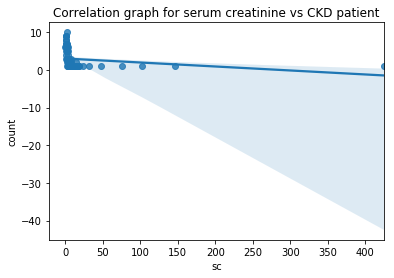

In [51]:
sns.regplot(data = sc_corr_y, x = 'sc', y = 'count').set_title('Correlation graph for serum creatinine vs CKD patient')

In [59]:
sc_corr_n = sc_corr1[sc_corr1['classification'] == 0].groupby(['sc']).size().reset_index(name = 'count')
sc_corr_n.corr()

,sc,count
sc,1.000000,-0.456063
count,-0.456063,1.000000


Text(0.5, 1.0, 'Correlation graph for serum creatinine vs CKD patient')

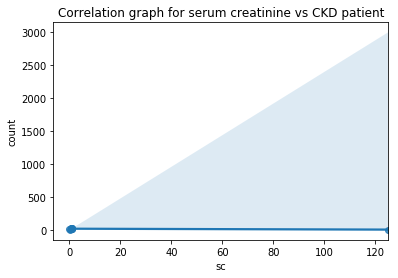

In [53]:
sns.regplot(data = sc_corr_n, x = 'sc', y = 'count').set_title('Correlation graph for serum creatinine vs CKD patient')

## What do we see here?
- In terms of distribution we definitely see a bigger range in CKD patients than healthy patients. 
- We are unable to determine correlation here.

# Correlation between diabetes mellitus and CKD
- Diabetes is often associated with CKD and for 45% of patients who receive dialysis therapy, diabetes is the primary cause of their kidney failure. 
- Additionally, moderate to severe CKD is estimated to be found in 15-23% of patients with diabetes.
- Given that diabetes here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [60]:
# Chi-sq test
cont = pd.crosstab(kidney_data["dm"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(129.1435878109185,
 3.6166235543296855e-26,
 5,
 array([[ 95.74226804, 155.25773196],
        [ 49.58762887,  80.41237113],
        [  1.1443299 ,   1.8556701 ],
        [  0.7628866 ,   1.2371134 ],
        [  0.3814433 ,   0.6185567 ],
        [  0.3814433 ,   0.6185567 ]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between diabetes and whether the patient has chronic kidney disease. 

# Correlation between coronary artery disease and CKD
- Coronary artery disease is the leading cause of morbidity and mortality in patients with CKD. 
- When you have heart disease, your heart may not be able to pump blood the right way causing pressure to build in the main vein connected to your kidneys. This may lead to a blockage and a reduced supply of oxygen rich blood to the kidneys, leading to kidney disease.
- Given that coronary artery disease here is a nominal data, we will need to use Chi-square test to calculate correlation. 
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
    * The null hypothesis is that they are independent.
    * The alternative hypothesis is that they are correlated in some way.

In [61]:
# Chi-sq test
cont = pd.crosstab(kidney_data["cad"],kidney_data["classification"])
scipy.stats.chi2_contingency(cont)

(27.333776061776067,
 1.701703609034339e-05,
 4,
 array([[133.50515464, 216.49484536],
        [ 12.96907216,  21.03092784],
        [  0.7628866 ,   1.2371134 ],
        [  0.3814433 ,   0.6185567 ],
        [  0.3814433 ,   0.6185567 ]]))

## What can we say about this?
- We performed the test and we obtained a p-value < 0.05 and we can reject the hypothesis of independence. There seem to be a correlation between coronary artery disease and whether the patient has chronic kidney disease. 

# Summary
- We observed strong correlation between CKD and the following:
    * Red blood cell 
    * Pus Cell
    * Blood glucose (strong negative correlation)
    * Blood urea (strong negative correlation)
    * Pedal edema 
    * Anemia 
    * Diabetes
    * Coronary artery disease
- I have explained majority of the sightings but there seem to be a weird observation for blood urea as I was expecting a positive correlation there. What I can say about that is that the CKD patients were informed about their issues and restricted their diet in order to reduce excessive nitrogen level in their blood to a safe level.